In [1]:
library(tidyverse)
library("ggplot2")
library("dplyr")
library("reshape2")
library("knitr")
library(e1071)
library(mosaic)

dfSC = read.csv("CumulativeCases.csv", header = T)
dfSD = read.csv("TotalDeaths.csv", header = T)
dfCC = read.csv("CumulCases2020.csv")
dfCD = read.csv("TotalDeaths2020.csv")

dfW_7 = read.csv("WHOselect7.csv", header = T)

cumulSC = read.csv("Cumulative.csv")
totDLD = read.csv("TotalDeathsLD.csv")

dfC3 = read.csv("CulumNon-Interpolated2003.csv", header = T)
dfD3 = read.csv("DeathNon-Interpolated2003.csv", header = T)
dfR3 = read.csv("RecoveredNon-Interpolated2003.csv", header = T)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Loading required package: lattice

Loading required package: ggformula

Loading required package: ggstance


Attaching package: ‘ggstance’


The following objects are masked from ‘package:ggplot2’:

    geom_errorbarh, GeomErrorbarh



New to ggformula?  Try the tutorials: 
	learnr::run_tutorial("introduction", package = "ggformula")
	learnr::run_tutorial("refining", package = "ggformula")

Loading required package: mosaicData

Loading required package: Matrix


Attaching package: ‘Matrix’


The following obj

In [2]:
sapply(cumulSC, class)

X    Canada.2003   Germany.2003     Italy.2003 Singapore.2003 
      "factor"      "integer"      "integer"      "integer"      "integer" 
       US.2003   Vietnam.2003     China.2003    Canada.2020     China.2020 
     "integer"      "integer"      "integer"      "integer"      "integer" 
  Germany.2020     Italy.2020 Singapore.2020        US.2020   Vietnam.2020 
     "integer"      "integer"      "integer"      "integer"      "integer"

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each country during the 2003 SARS outbreak. 

Skewness:  1.614755 
Kurtosis:  0.7856613

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,36.5,206,236,7084,1120.571,2631.596,7,0


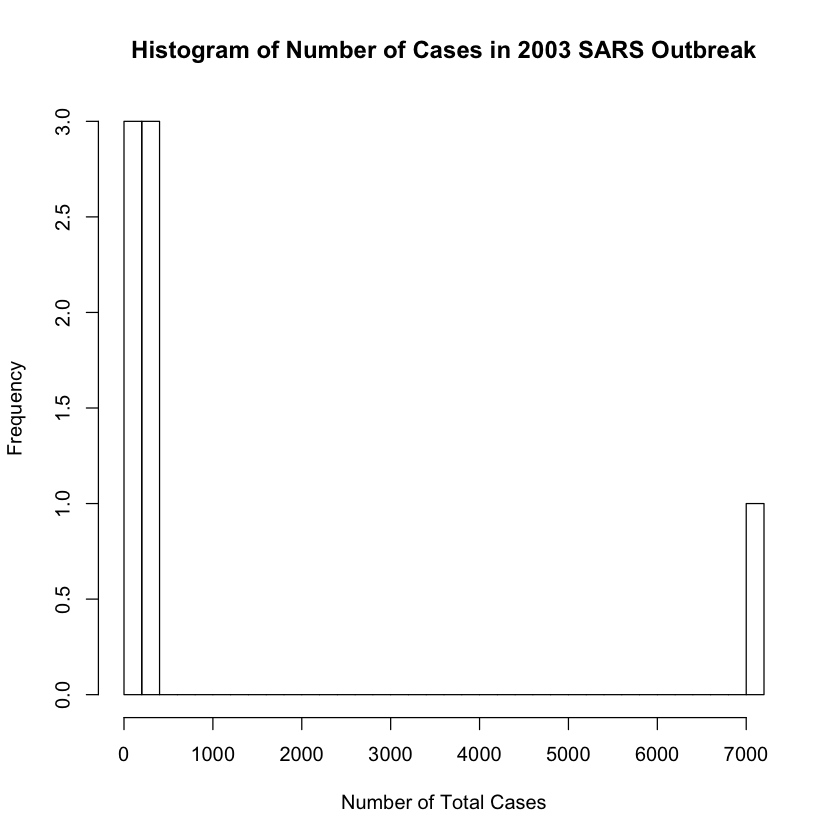

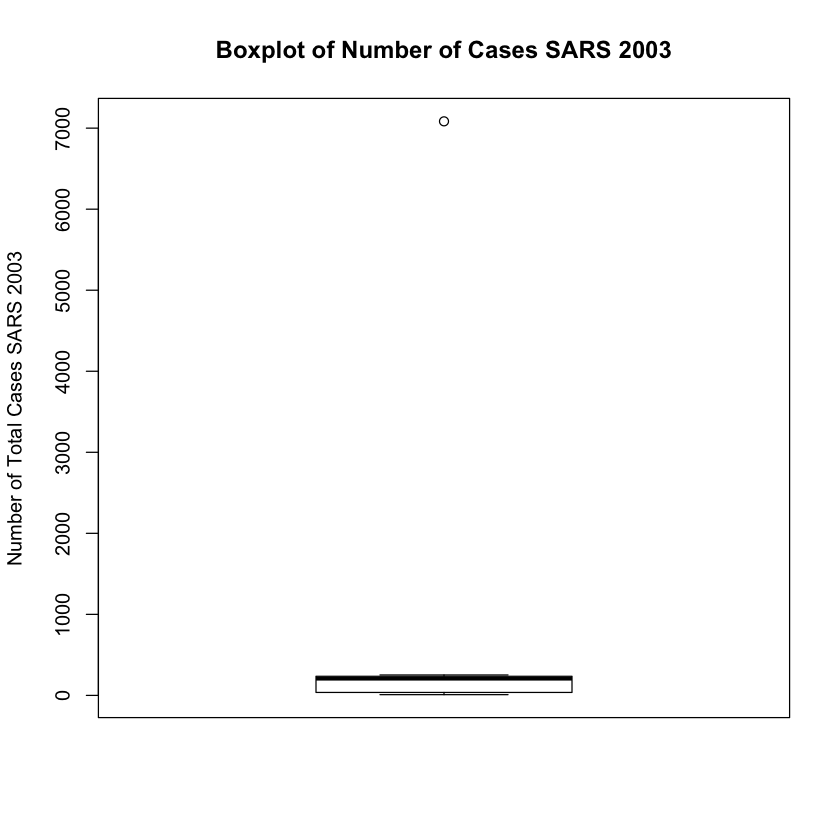

In [38]:
t2003 <- c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003)
hist(t2003, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003 SARS Outbreak", breaks = 30)
skew <- skewness(t2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003)
cat("Kurtosis: ", k)

favstats(t2003)
boxplot(t2003, ylab = "Number of Total Cases SARS 2003", main = "Boxplot of Number of Cases SARS 2003")

The distribution is positively skewed and has heavier tails. The number of cumulative cases in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each country during the 2003 SARS outbreak (excluding China). 

Skewness:  -0.02329566 
Kurtosis:  -2.186801

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,9,23.25,134.5,216.5,252,126.6667,111.5557,6,0


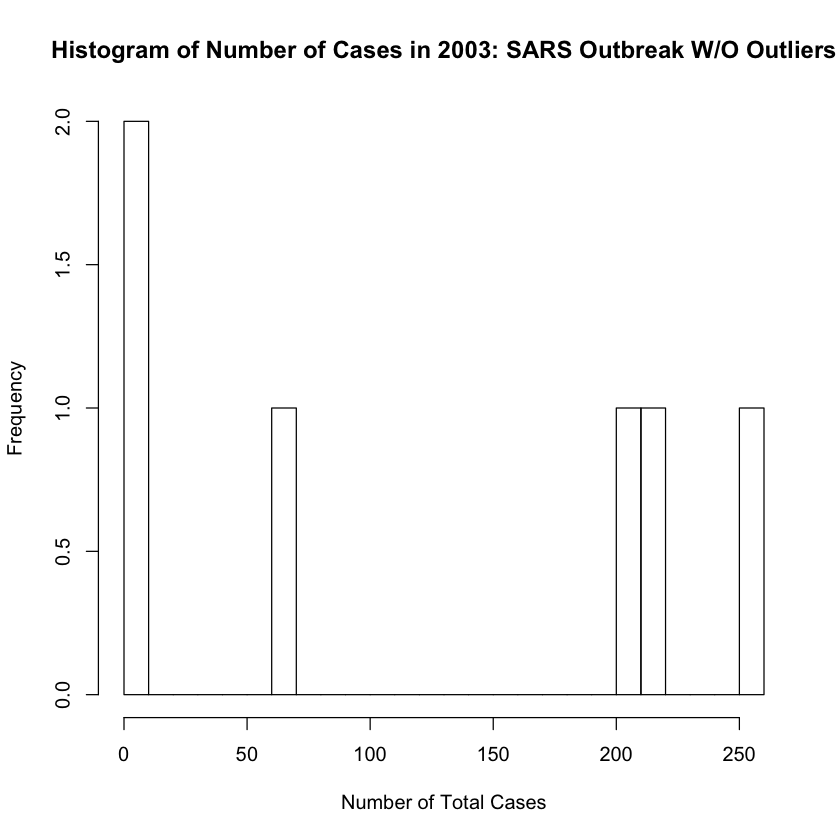

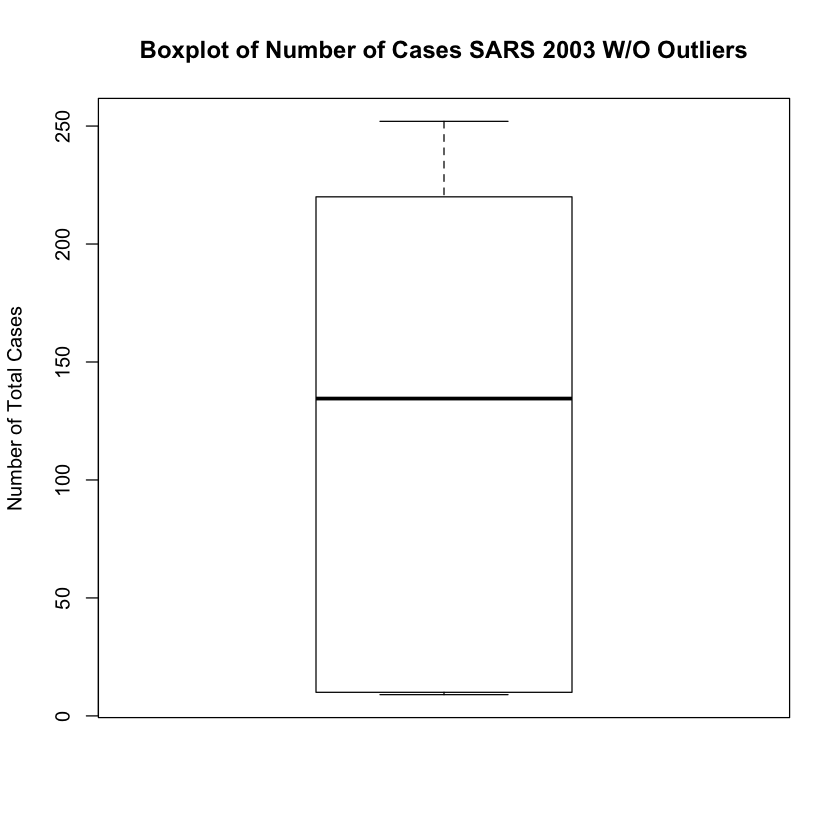

In [26]:
t2003_2 = c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003, cumulSC$US.2003, cumulSC$Vietnam.2003)
hist(t2003_2, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2003: SARS Outbreak W/O Outliers", breaks = 20)
skew <- skewness(t2003_2)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2003_2)
cat("Kurtosis: ", k)

favstats(t2003_2)
boxplot(t2003_2, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases SARS 2003 W/O Outliers")

The skew decreased significantly after the removal of China's 2003 SARS cumulative case data. According to the skew value, the distribution is almost completely normal. The kurtosis value indicates that the processed distribution has light tails.  

The histogram and boxplot are displaying the distribution of the number of cumulative cases in each country during the 2020 COVID-19 outbreak. 

Skewness:  0.2142627 
Kurtosis:  -1.75893

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,188,3562,62095,89905.5,140886,55729.14,55214.49,7,0


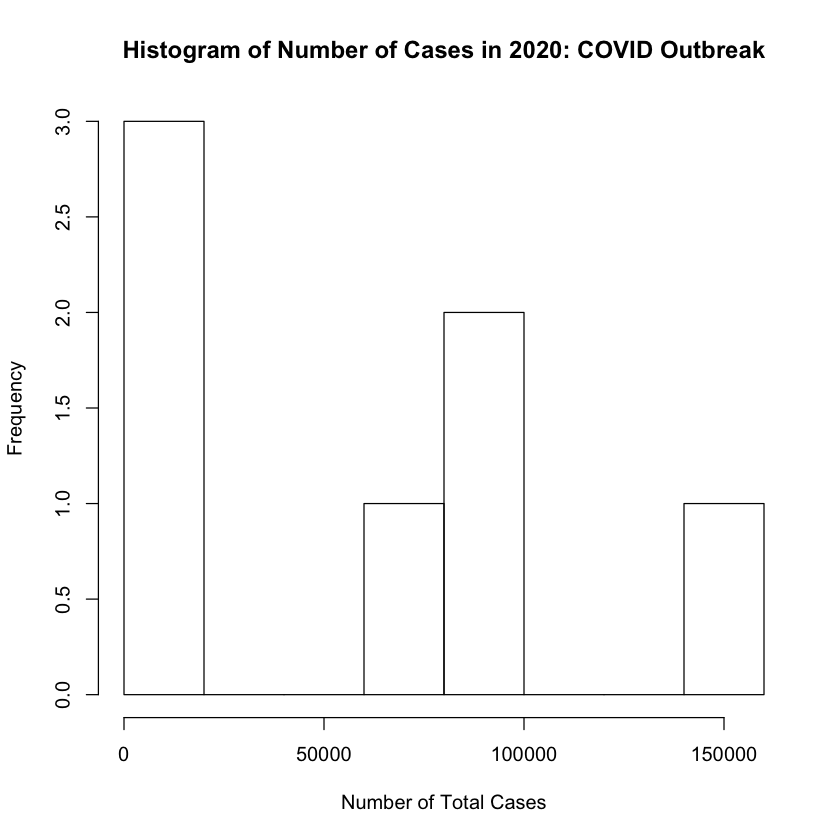

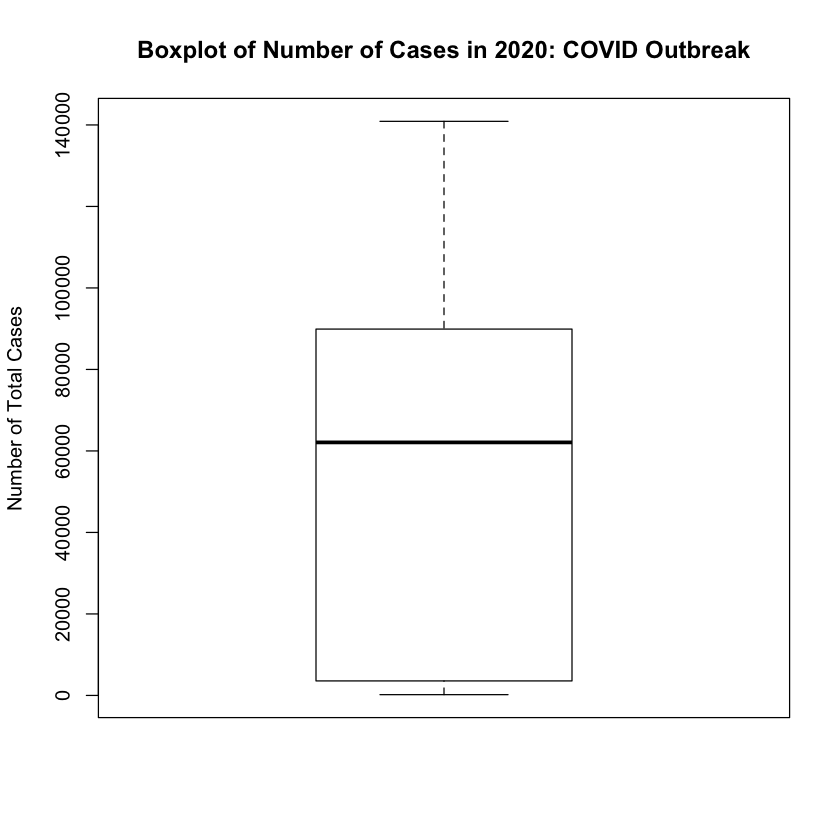

In [28]:
t2020 <- c(cumulSC$Canada.2020, cumulSC$Germany.2020, cumulSC$Italy.2020, cumulSC$Singapore.2020, cumulSC$US.2020, cumulSC$Vietnam.2020, cumulSC$China.2020)
hist(t2020, xlab ='Number of Total Cases', main = "Histogram of Number of Cases in 2020: COVID Outbreak", breaks = 6)
skew <- skewness(t2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(t2020)
cat("Kurtosis: ", k)

favstats(t2020)
boxplot(t2020, ylab = "Number of Total Cases", main = "Boxplot of Number of Cases in 2020: COVID Outbreak")

The distribution is slightly positively skewed and is not completely normal. No outliers were found in this data. The kurtosis was a large negative value, which means that the distribution had light tails. 

The histogram and boxplot are displaying the distribution of the death totals in each country during the 2003 SARS outbreak.

Skewness:  1.60474 
Kurtosis:  0.764864

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,5,35,646,103,239.9812,7,0


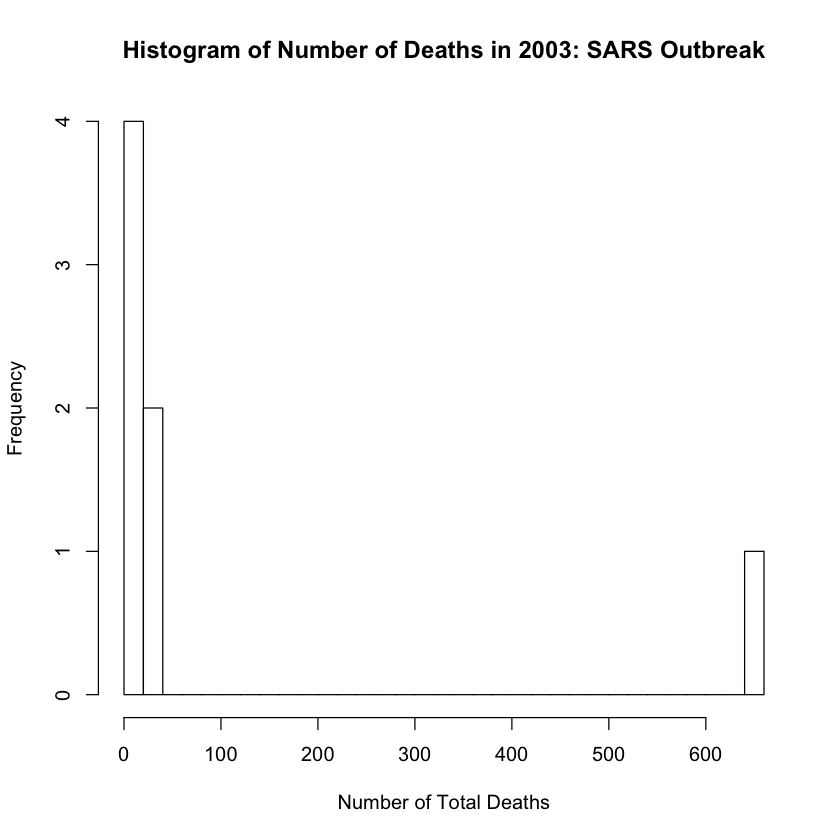

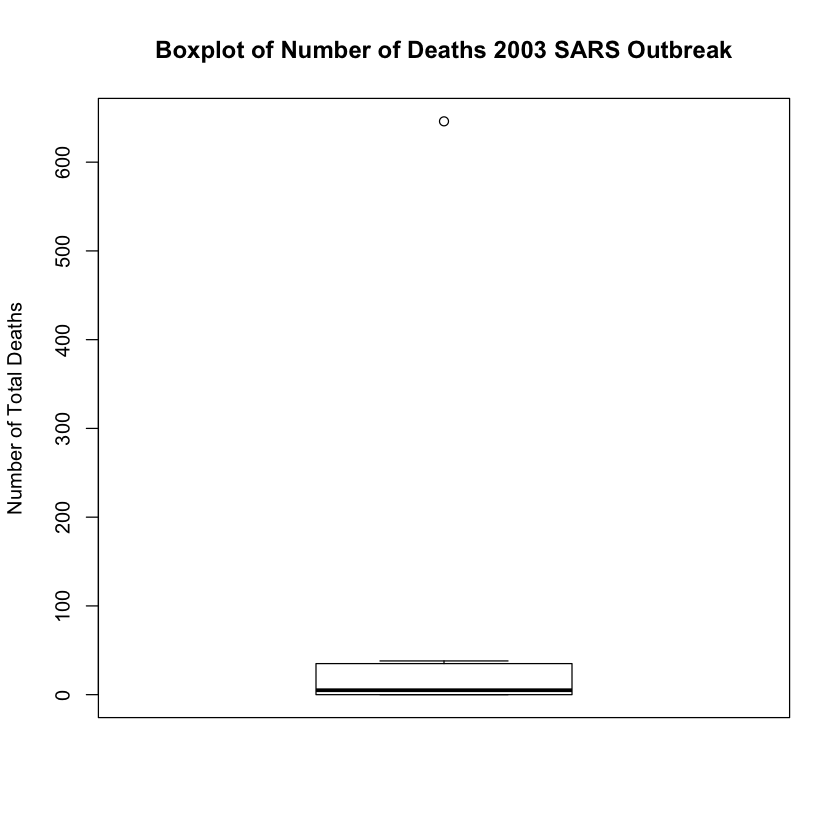

In [43]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak", breaks = 25)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The distribution is positively skewed and has heavier tails. The total deaths in China seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each country during the 2003 SARS outbreak (excluding China).

Skewness:  0.5380714 
Kurtosis:  -1.8913

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,0,2.5,25.25,38,12.5,17.63803,6,0


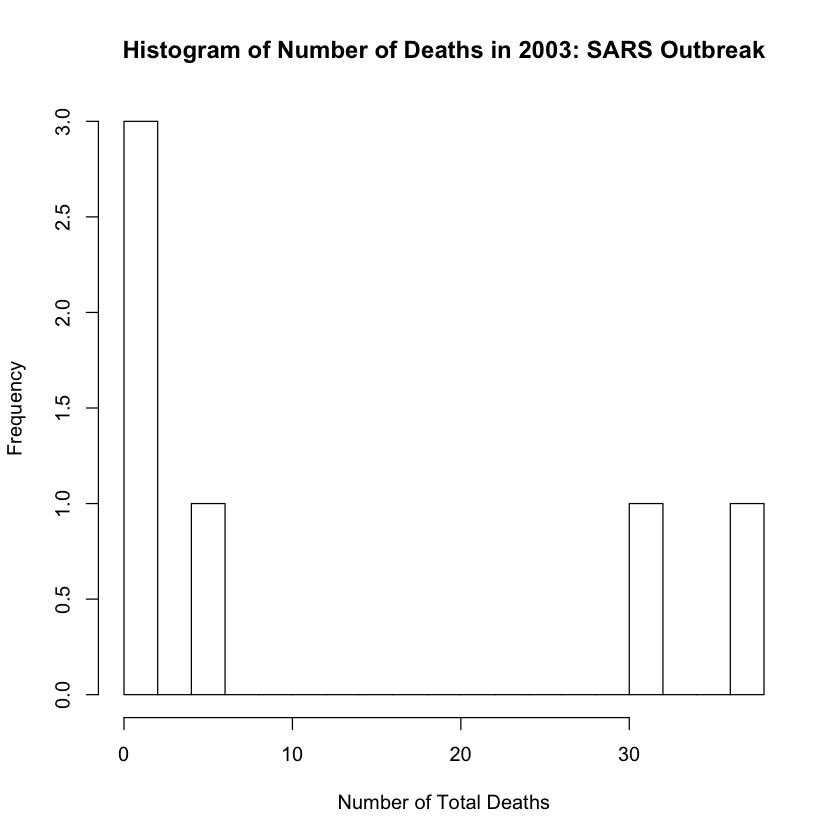

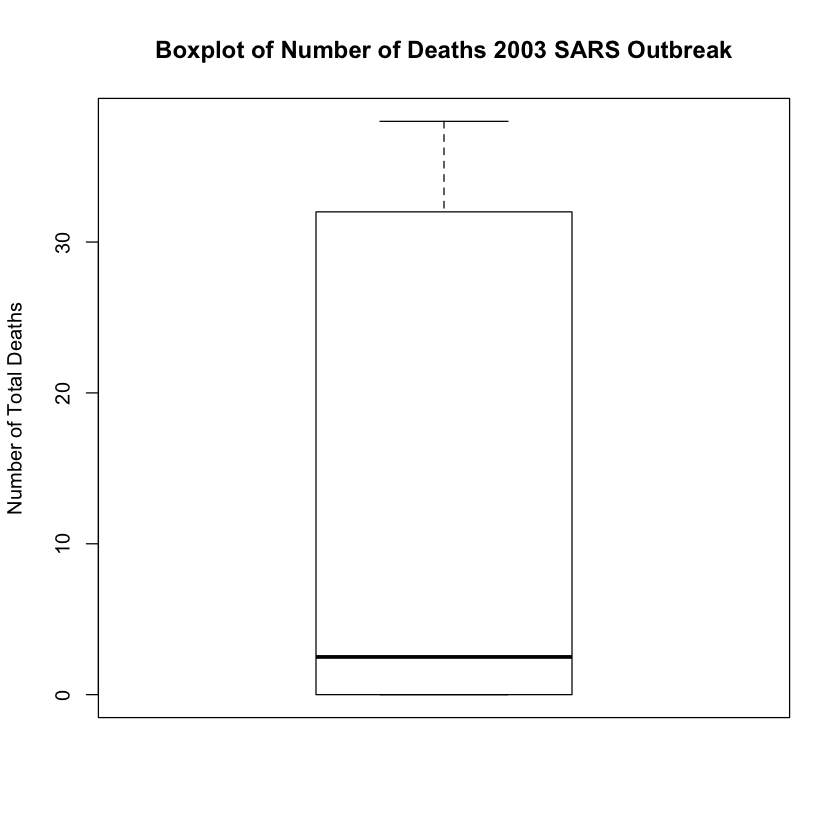

In [46]:
d2003 = c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003, totDLD$US.2003, totDLD$Vietnam.2003)
hist(d2003, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2003: SARS Outbreak", breaks = 15)
skew <- skewness(d2003)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2003)
cat("Kurtosis: ", k)

favstats(d2003)
boxplot(d2003, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2003 SARS Outbreak")

The removal of China created an new distribution with lighter tails. The distribution is still positively skewed. However, the removal of China significantly lowered the skewness of the data. 

The histogram and boxplot are displaying the distribution of the death totals in each country during the COVID-19 outbreak.

Skewness:  1.268456 
Kurtosis:  0.03153421

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,33.5,533,2885.5,10779,2450,3904.272,7,0


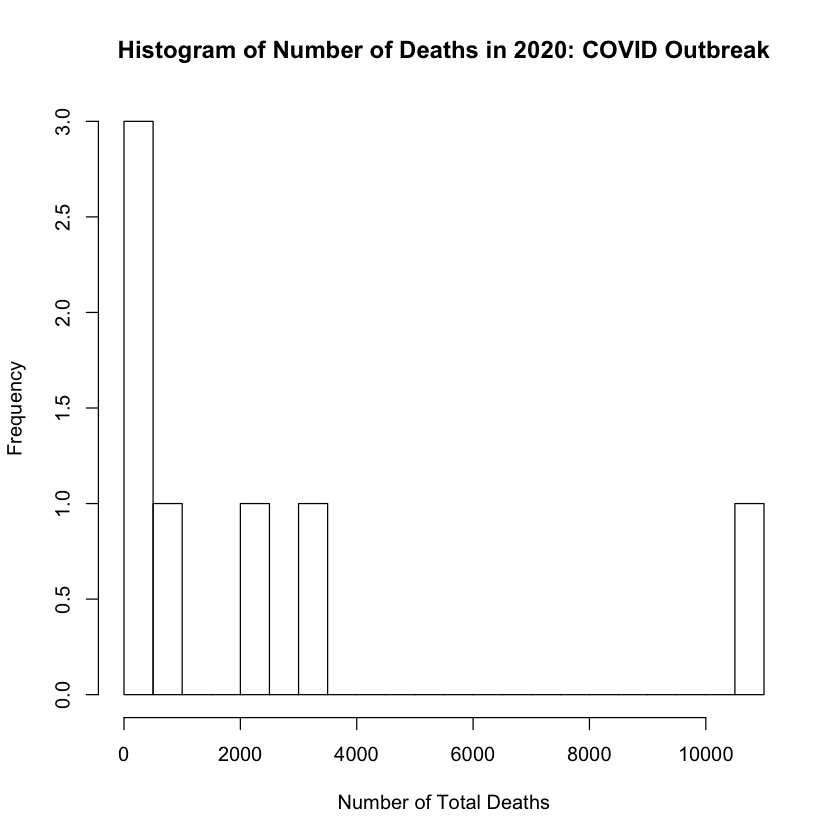

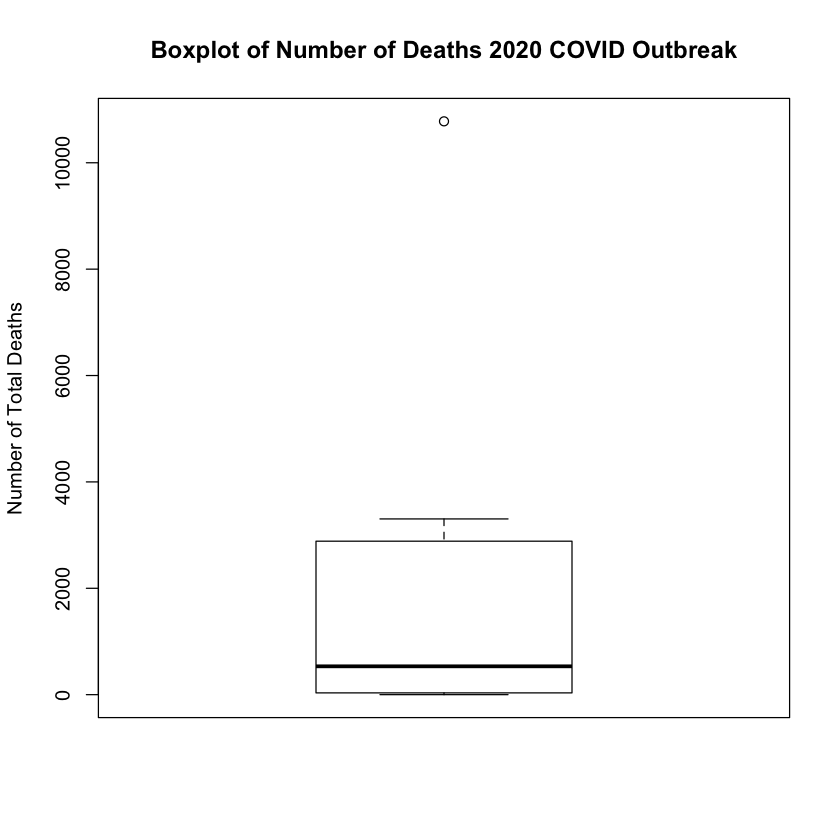

In [48]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Italy.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak", breaks = 20)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

The distribution is positively skewed. The kurtosis value indicates that the distribution does not have lighter or heavier tails.The total deaths in Italy seems to be an outlier. The outlier is removed in order to see how the distribution changes. 

The histogram and boxplot are displaying the distribution of the death totals in each country during the COVID-19 outbreak (excluding Italy).

Skewness:  0.5740831 
Kurtosis:  -1.767573

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,0,18.25,298.5,1983.5,3304,1061.833,1450.914,6,0


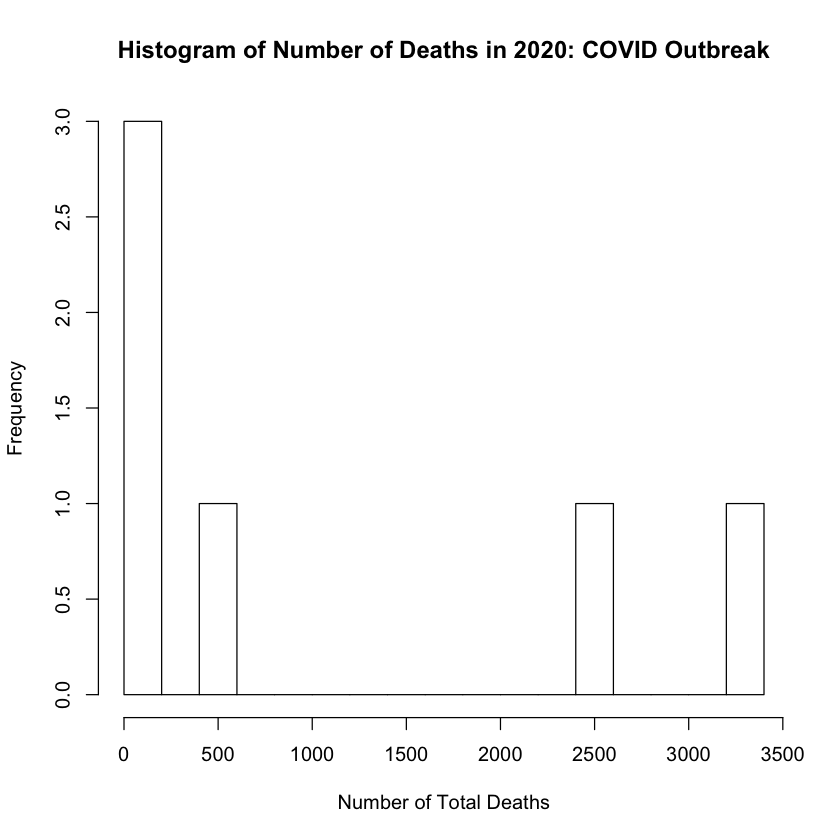

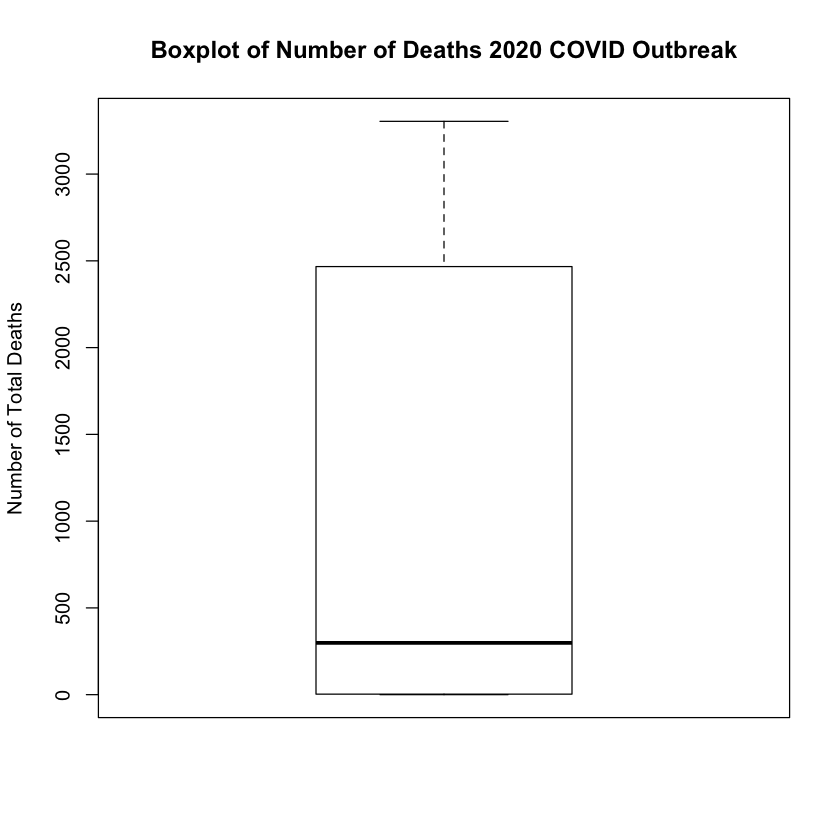

In [50]:
d2020 = c(totDLD$Canada.2020, totDLD$Germany.2020, totDLD$Singapore.2020, totDLD$US.2020, totDLD$Vietnam.2020, totDLD$China.2020)
hist(d2020, xlab ='Number of Total Deaths', main = "Histogram of Number of Deaths in 2020: COVID Outbreak", breaks = 15)
skew <- skewness(d2020)
cat("Skewness: ", skew, "\n")
k <- kurtosis(d2020)
cat("Kurtosis: ", k)

favstats(d2020)
boxplot(d2020, ylab = "Number of Total Deaths", main = "Boxplot of Number of Deaths 2020 COVID Outbreak")

The removal of Italy created an new distribution with lighter tails. The distribution is still positively skewed. However, the removal of Italy significantly lowered the skewness of the data. 

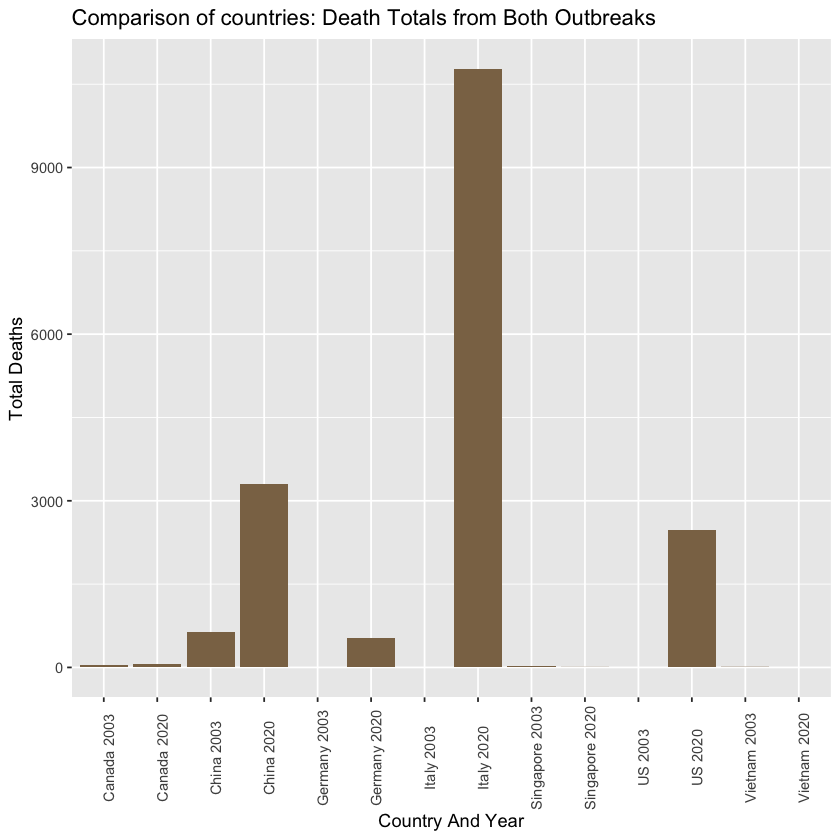

In [51]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(totDLD$Canada.2020, totDLD$Canada.2003, totDLD$Germany.2020, totDLD$Germany.2003,
                          totDLD$Italy.2020, totDLD$Italy.2003, totDLD$Singapore.2020, totDLD$Singapore.2003,
                          totDLD$US.2020, totDLD$US.2003, totDLD$Vietnam.2020, totDLD$Vietnam.2003,
                          totDLD$China.2020, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'burlywood4') + 
                    ggtitle("Comparison of countries: Death Totals from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

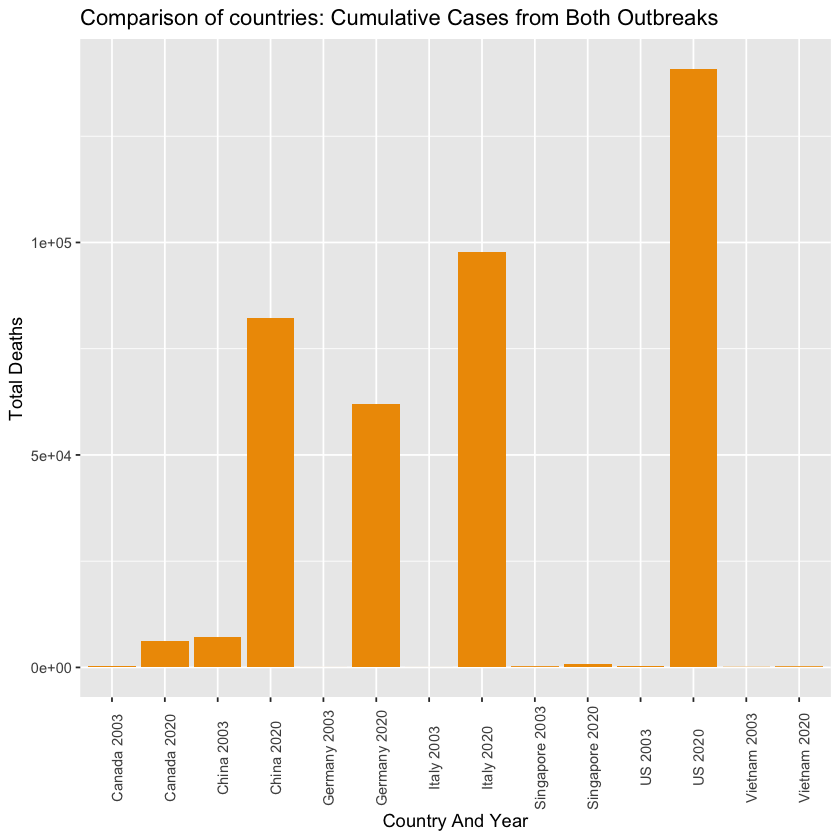

In [52]:
data <- data.frame(CountryYear= c("Canada 2020", "Canada 2003", "Germany 2020", "Germany 2003", "Italy 2020", 
                                  "Italy 2003", "Singapore 2020", "Singapore 2003", "US 2020", "US 2003", 
                                  "Vietnam 2020", "Vietnam 2003", "China 2020", "China 2003"),  
                   Total=c(cumulSC$Canada.2020, cumulSC$Canada.2003, cumulSC$Germany.2020, cumulSC$Germany.2003,
                          cumulSC$Italy.2020, cumulSC$Italy.2003, cumulSC$Singapore.2020, cumulSC$Singapore.2003,
                          cumulSC$US.2020, cumulSC$US.2003, cumulSC$Vietnam.2020, cumulSC$Vietnam.2003,
                          cumulSC$China.2020, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'orange2') + 
                    ggtitle("Comparison of countries: Cumulative Cases from Both Outbreaks") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

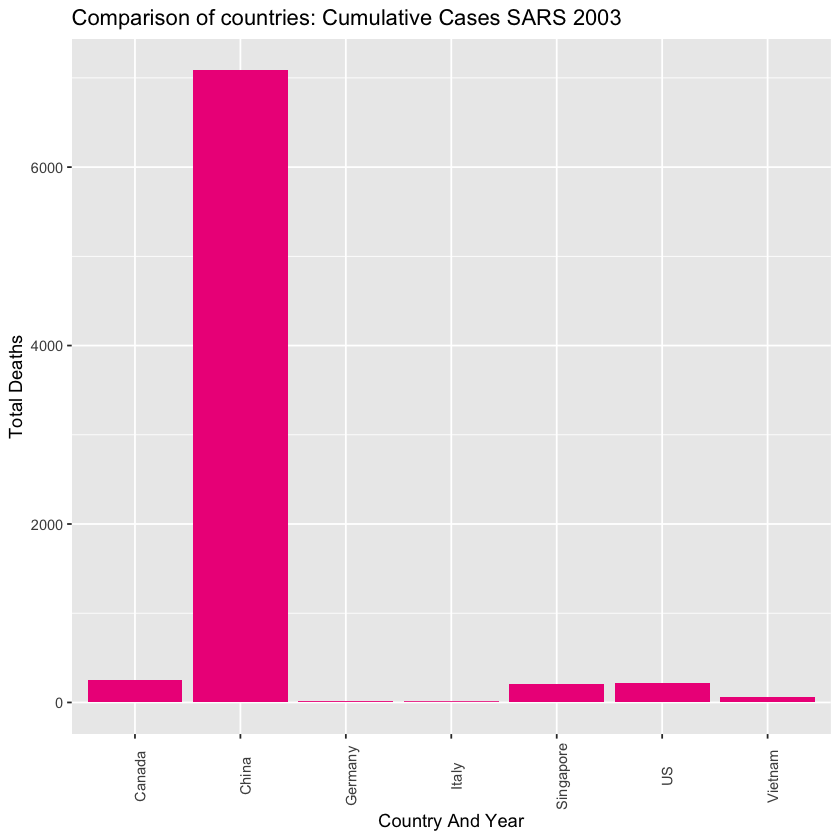

In [53]:
data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(cumulSC$Canada.2003, cumulSC$Germany.2003, cumulSC$Italy.2003, cumulSC$Singapore.2003,
                        cumulSC$US.2003, cumulSC$Vietnam.2003, cumulSC$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill = 'deeppink2') + 
                    ggtitle("Comparison of countries: Cumulative Cases SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

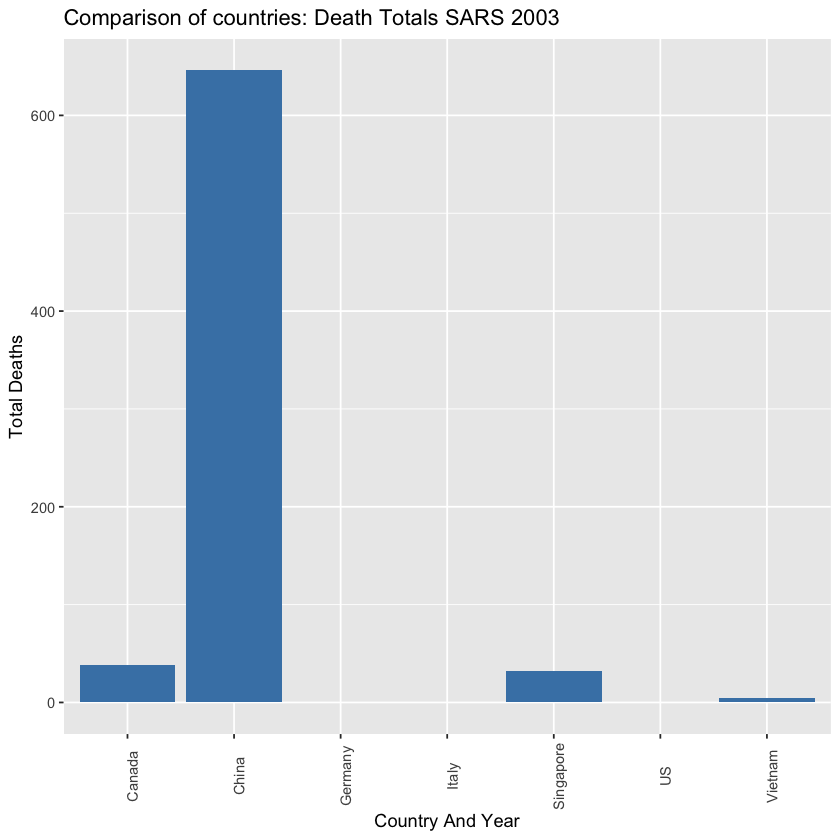

In [54]:
library(ggplot2)

data <- data.frame(CountryYear= c("Canada", "Germany", "Italy", "Singapore", "US", "Vietnam", "China"),  
                   Total=c(totDLD$Canada.2003, totDLD$Germany.2003, totDLD$Italy.2003, totDLD$Singapore.2003,
                           totDLD$US.2003, totDLD$Vietnam.2003, totDLD$China.2003))

barplot <- ggplot(data, aes(x=CountryYear, y=Total)) + geom_bar(stat = "identity", fill="steelblue") + 
                    ggtitle("Comparison of countries: Death Totals SARS 2003") + xlab("Country And Year") + ylab("Total Deaths") +
                    theme(axis.text.x = element_text(angle = 90))
barplot

In [55]:
library(pwr)
library(distr)

Loading required package: startupmsg

Utilities for Start-Up Messages (version 0.9.6)

For more information see ?"startupmsg", NEWS("startupmsg")


Loading required package: sfsmisc


Attaching package: ‘sfsmisc’


The following object is masked from ‘package:mosaic’:

    factorize


The following object is masked from ‘package:dplyr’:

    last


Object Oriented Implementation of Distributions (version 2.8.0)

Attention: Arithmetics on distribution objects are understood as operations on corresponding random variables (r.v.s); see distrARITH().
Some functions from package 'stats' are intentionally masked ---see distrMASK().
Note that global options are controlled by distroptions() ---c.f. ?"distroptions".

For more information see ?"distr", NEWS("distr"), as well as
  http://distr.r-forge.r-project.org/
Package "distrDoc" provides a vignette to this package as well as to several extension packages; try vignette("distr").



Attaching package: ‘distr’


The following object is masked 

In [56]:
pwr.t.test(n = 96, d = 0.5, sig.level = 0.05, alternative = "greater")


     Two-sample t test power calculation 

              n = 96
              d = 0.5
      sig.level = 0.05
          power = 0.9646091
    alternative = greater

NOTE: n is number in *each* group


The t tests comparing the death totals, in selected countries, from the 2003 SARS Outbreak will have 96.4% power. 

In [16]:
pwr.t.test(d=0.5, sig.level = 0.05, power = 0.8, alternative = "greater")


     Two-sample t test power calculation 

              n = 50.1508
              d = 0.5
      sig.level = 0.05
          power = 0.8
    alternative = greater

NOTE: n is number in *each* group


50 days of SARS data need to be collected in each country to have 0.8 power. 

In [17]:
ttest = t.test(dfSD$China, dfSD$Canada, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$China and dfSD$Canada
t = 14.221, df = 95.427, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 318.7531      Inf
sample estimates:
mean of x mean of y 
381.89583  20.98958 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

China will recieve the most severe classification. The t-test indicates that China has significantly more mean deaths per day than the country with the second highest mean deaths per day (Canada). The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid. 

Reject the null hypothesis for the t-test between China and Canada. 

In [18]:
ttest = t.test(dfSD$Canada, dfSD$Singapore, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Canada and dfSD$Singapore
t = -0.22785, df = 189.98, p-value = 0.59
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.181406       Inf
sample estimates:
mean of x mean of y 
 20.98958  21.37500 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Canada and Singapore will be placed in the second most severe classification. The t-test indicates that there is no significant difference between the mean deaths per day of the two countries. The 95% confidence interval contains the value 0 and the p-value is above 0.05. Therefore, this conclusion is valid.

Fail to reject the null hypothesis for the t-test between Singapore and Canada.

In [19]:
ttest = t.test(dfSD$Singapore, dfSD$Vietnam, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Singapore and dfSD$Vietnam
t = 14.056, df = 96.044, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 14.78915      Inf
sample estimates:
mean of x mean of y 
21.375000  4.604167 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Vietnam will be placed in the third most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and Singapore. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.
Singapore has a lower death total than Canada. Therefore, it can be assumed that Vietnam's mean deaths per day will have a significant difference from Canada's mean deaths per day. 

Reject the null hypothesis for the t-test between Singapore and Vietnam. 

In [20]:
ttest = t.test(dfSD$Vietnam, dfSD$United.States, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$Vietnam and dfSD$United.States
t = 52.197, df = 95, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 4.45765     Inf
sample estimates:
mean of x mean of y 
 4.604167  0.000000 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

United States will be placed in the fourth most severe classification. The t-test indicates that there is a significant difference in the mean deaths per day between Vietnam and the United States. The 95% confidence interval does not contain the value 0 and the p-value is below 0.05. Therefore, this conclusion is valid.

Reject the null hypothesis for the t-test between Vietnam and United States. 

In [21]:
ttest = t.test(dfSD$United.States, dfSD$Germany, alternative = "greater", paired = FALSE)
ttest


	Welch Two Sample t-test

data:  dfSD$United.States and dfSD$Germany
t = NaN, df = NaN, p-value = NA
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 NaN NaN
sample estimates:
mean of x mean of y 
        0         0 


Null hypothesis: There is no difference in the mean deaths per day between the two countries. 
Alternative hypothesis: This is a difference in the mean deaths per day between the two countries.

Fail to reject the null hypothesis for the t-test between Germany and United States.

Germany, Italy, and United States did not experience a death during the outbreak. They will be placed in the fourth classification. The t-test does not have anything to compare. 

In [22]:
dfW_7$classification <- c(2,1,4,4,2,4,3)
dfW_7

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,2
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,4
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,4
Singapore,4183.273,2.8,38,40,8.7,11.1,1.8,1.4,79.6,⋯,3,3,3,90,80,101,53,49,56,2
United States of America,291037.954,1.1,52,51,16.4,16.2,2.0,2.1,77.3,⋯,7,7,7,140,134,148,83,81,84,4
Vietnam,80278.208,1.5,76,59,7.3,7.4,3.4,2.3,69.6,⋯,33,28,37,200,184,215,129,117,140,3


In [23]:
library(magrittr)


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [53]:
dfW_20 = read.csv("WHOselect20.csv", header = T)

In [54]:
dfW_20$classification <- c(0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1)
dfW_20

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,⋯,34,29,40,246,235,257,136,128,145,0
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,1
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,⋯,19,17,21,236,220,251,99,87,113,0
Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,⋯,3,3,3,135,131,140,60,56,64,0
France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,⋯,4,4,5,133,128,138,60,58,62,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,0
India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,⋯,95,86,106,291,268,314,220,197,243,0
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,0


In [55]:
dfW_20 %<>% mutate_if(is.integer,as.numeric)
dfW_20

Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,68.9,⋯,34,29,40,246,235,257,136,128,145,0
Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,79.8,⋯,5,5,5,95,93,97,58,57,60,1
China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,71.1,⋯,41,38,44,165,154,175,104,93,112,1
Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,71.8,⋯,19,17,21,236,220,251,99,87,113,0
Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,78.2,⋯,3,3,3,135,131,140,60,56,64,0
France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,79.7,⋯,4,4,5,133,128,138,60,58,62,1
Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,78.7,⋯,4,4,4,118,114,123,60,59,62,0
India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,61.0,⋯,95,86,106,291,268,314,220,197,243,0
Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,79.7,⋯,5,4,5,96,92,100,49,46,51,0


In [56]:
write.csv(dfW_20,"dfW20.csv", row.names = TRUE)

In [57]:
dfW20 = read.csv("dfW20.csv", header = T)

In [58]:
library(caret)
library(randomForest)
library(varImp)
library(naivebayes)

In [59]:
sapply(dfW20, class)

X 
                                                                                   "integer" 
                                                                                Member.State 
                                                                                    "factor" 
                                                                            Total.population 
                                                                                   "numeric" 
                                                            Annual.Growth.Rate.....1992.2002 
                                                                                   "numeric" 
                                                                       Dependency.ratio.1992 
                                                                                   "integer" 
                                                                       Dependency.ratio.2002 
                                                                                   "integer" 
                                                    Percentage.of.population.aged.60...1992. 
                                                                                   "numeric" 
                                                           Percentage.of.population.aged.60. 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.1992 
                                                                                   "numeric" 
                                                                   Total.Fertility.Rate.2002 
                                                                                   "numeric" 
                                                    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 
                                                                                   "numeric" 
                                                 LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years. 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                LIFE.EXPECTANCY.AT.BIRTH.MALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                               LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years. 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Lower.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
              LIFE.EXPECTANCY.AT.BIRTH.FEMALES.2002..years..Upper.Bound.Uncertainty.Interval 
                                                                                   "numeric" 
                                              PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
  PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000. 
                                                                                   "integer" 
                                            PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 
                                                                                   "integer" 
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000. 
                                                 

In [60]:
df <- dfW20 
df
#0 means less than 5 deaths
#1 means 5 or more deaths occured

X,Member.State,Total.population,Annual.Growth.Rate.....1992.2002,Dependency.ratio.1992,Dependency.ratio.2002,Percentage.of.population.aged.60...1992.,Percentage.of.population.aged.60.,Total.Fertility.Rate.1992,Total.Fertility.Rate.2002,⋯,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.MALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Upper.Bound.Uncertainty.Interval..per.1000.,PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002.Lower.Bound.Uncertainty.Interval..per.1000.,classification
<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Brazil,176257.327,1.4,63,51,6.8,8.1,2.6,2.2,⋯,34,29,40,246,235,257,136,128,145,0
2,Canada,31271.069,1.0,47,45,15.8,17.1,1.7,1.5,⋯,5,5,5,95,93,97,58,57,60,1
3,China,1302307.069,0.9,49,44,8.6,10.0,2.0,1.8,⋯,41,38,44,165,154,175,104,93,112,1
4,Colombia,43526.430,1.8,66,59,6.4,7.1,3.0,2.6,⋯,19,17,21,236,220,251,99,87,113,0
5,Finland,5197.451,0.3,49,49,18.7,20.3,1.8,1.7,⋯,3,3,3,135,131,140,60,56,64,0
6,France,59849.658,0.4,52,53,19.5,20.5,1.7,1.9,⋯,4,4,5,133,128,138,60,58,62,1
7,Germany,82414.408,0.2,46,48,20.5,24.0,1.3,1.3,⋯,4,4,4,118,114,123,60,59,62,0
8,India,1049549.474,1.8,68,62,6.9,7.7,3.8,3.1,⋯,95,86,106,291,268,314,220,197,243,0
9,Italy,57482.385,0.1,45,49,21.7,24.5,1.3,1.2,⋯,5,4,5,96,92,100,49,46,51,0


In [61]:
model_1 <- glm(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
             family = "binomial", data = df) 
summary(model_1)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = classification ~ Total.population + Dependency.ratio.2002 + 
    Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 + 
    LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
    PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 + PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 + 
    PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.913e-05  -7.658e-06  -2.100e-08   2.100e-08   3.357e-05  

Coefficients:
                                                   Estimate Std. Error z value
(Intercept)                                      -1.401e+04  8.057e+06  -0.002
Total.population                                 -2.404e-04  2.806e-01  -0.001
Dependency.ratio.2002                             4.394e+01  2.448e+04   0.002
Percentage.of.population.aged.60.                -1.107e+02  5.825e+04  -0.002
Total.Fertil

In [62]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Total.population + Dependency.ratio.2002 + 
               Percentage.of.population.aged.60. + Total.Fertility.Rate.2002 +
               LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002 + 
               PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.MALES.2002 +
               PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Generalized Linear Model 

15 samples
 9 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14, 14, 14, 13, 13, 14, ... 
Resampling results:

  Accuracy  Kappa
  0.65      0    



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 1 2
         1 2 0
                                          
               Accuracy : 0.2             
                 95% CI : (0.0051, 0.7164)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.9898          
                                          
                  Kappa : -0.6667         
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.3333          
            Specificity : 0.0000          
         Pos Pred Value : 0.3333          
         Neg Pred Value : 0.0000          
             Prevalence : 0.6000          
         Detection Rate : 0.2000          
   Detection Prevalence : 0.6000          
      Balanced Accuracy : 0.1667          
                                          
       'Positive' Class : 0               
                                          

glm variable importance

                                                 Overall
Percentage.of.population.aged.60.                100.000
Dependency.ratio.2002                             85.200
Total.Fertility.Rate.2002                         69.729
PROBABILITY.OF.DYING.AGE.15.59.FEMALES.2002       55.474
LIFE.EXPECTANCY.AT.BIRTH.BOTH.SEXES.2002          53.600
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.FEMALES.2002  30.296
PROBABILITY.OF.DYING.UNDER.AGE.OF.5.MALES.2002    26.423
PROBABILITY.OF.DYING.AGE.15.59.MALES.2002          8.471
Total.population                                   0.000

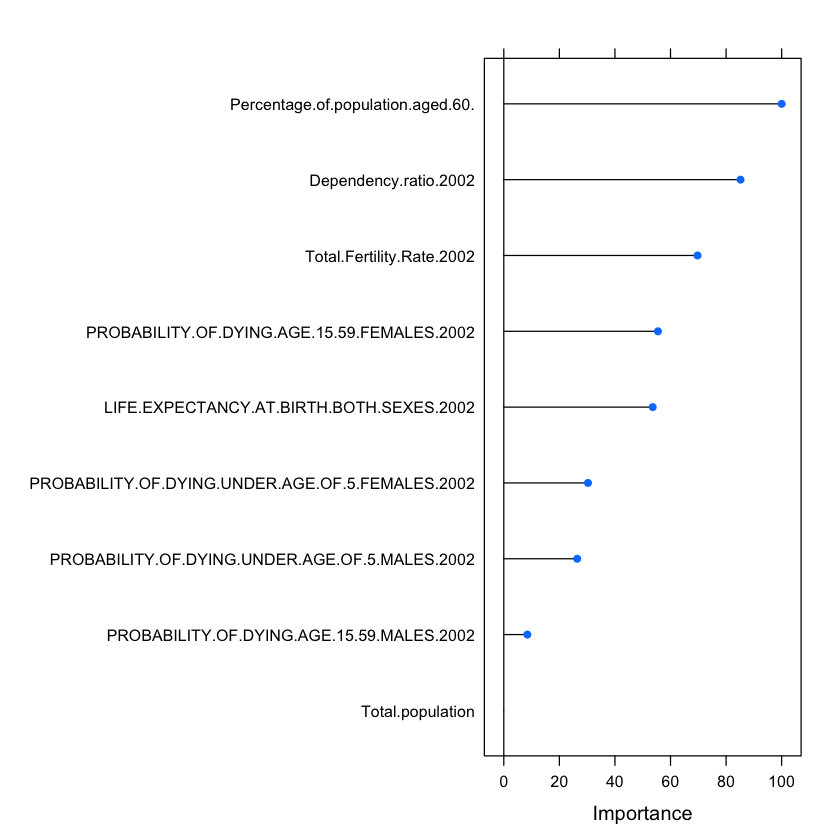

In [63]:
X <- caret::varImp(model)
plot(X)
X

There are three variables above 65 importance. Those variables will be chosen for the second model. 

In [67]:
model_2 <- glm(classification ~ Percentage.of.population.aged.60. + Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_2)


Call:
glm(formula = classification ~ Percentage.of.population.aged.60. + 
    Dependency.ratio.2002 + Total.Fertility.Rate.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5627  -0.8837  -0.6243   0.9652   2.0379  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)                        4.88241    4.73080   1.032   0.3021  
Percentage.of.population.aged.60. -0.25168    0.15276  -1.648   0.0994 .
Dependency.ratio.2002              0.06261    0.10112   0.619   0.5358  
Total.Fertility.Rate.2002         -2.62308    2.13232  -1.230   0.2186  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.920  on 19  degrees of freedom
Residual deviance: 23.597  on 16  degrees of freedom
AIC: 31.597

Number of Fisher Scoring iterations: 4


In [68]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Percentage.of.population.aged.60. + Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Generalized Linear Model 

15 samples
 3 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14, 14, 14, 13, 13, 14, ... 
Resampling results:

  Accuracy  Kappa    
  0.7       0.4285714



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 0 1
         1 3 1
                                          
               Accuracy : 0.2             
                 95% CI : (0.0051, 0.7164)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.9898          
                                          
                  Kappa : -0.4286         
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.00            
            Specificity : 0.50            
         Pos Pred Value : 0.00            
         Neg Pred Value : 0.25            
             Prevalence : 0.60            
         Detection Rate : 0.00            
   Detection Prevalence : 0.20            
      Balanced Accuracy : 0.25            
                                          
       'Positive' Class : 0               
                                          

glm variable importance

                                  Overall
Dependency.ratio.2002              100.00
Total.Fertility.Rate.2002           89.67
Percentage.of.population.aged.60.    0.00

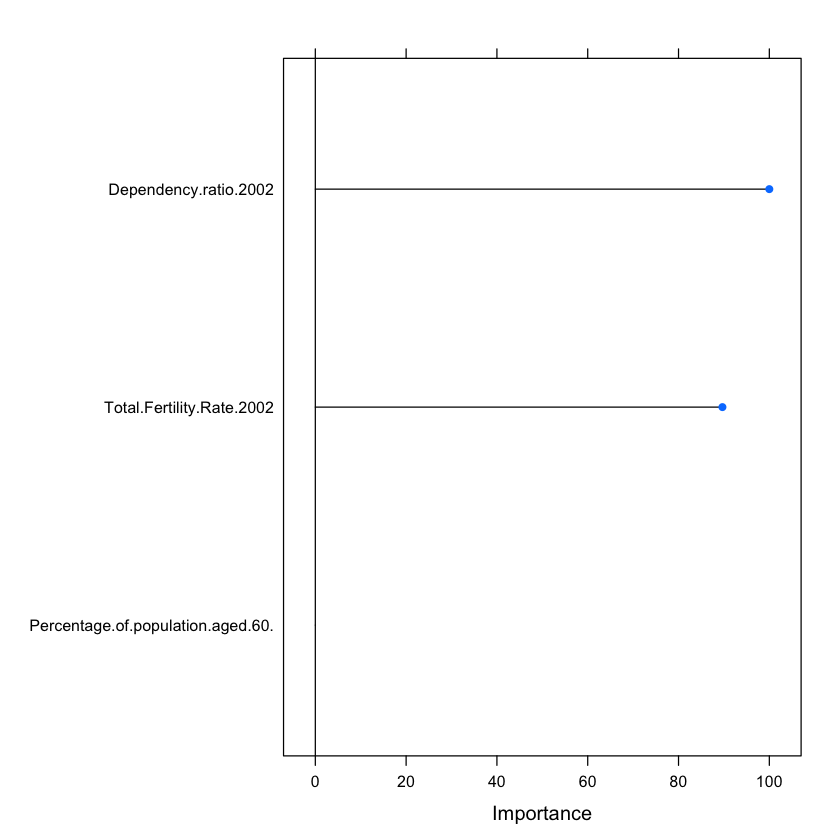

In [69]:
X <- caret::varImp(model)
plot(X)
X

In [71]:
model_3 <- glm(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_3)


Call:
glm(formula = classification ~ Dependency.ratio.2002 + Total.Fertility.Rate.2002, 
    family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2727  -1.0087  -0.9204   1.3208   1.3959  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)               -0.03807    3.45325  -0.011    0.991
Dependency.ratio.2002     -0.02455    0.08413  -0.292    0.770
Total.Fertility.Rate.2002  0.44152    1.00684   0.439    0.661

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.920  on 19  degrees of freedom
Residual deviance: 26.725  on 17  degrees of freedom
AIC: 32.725

Number of Fisher Scoring iterations: 4


In [73]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Generalized Linear Model 

15 samples
 2 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14, 14, 14, 13, 13, 14, ... 
Resampling results:

  Accuracy  Kappa
  0.55      0    



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 2 2
         1 1 0
                                          
               Accuracy : 0.4             
                 95% CI : (0.0527, 0.8534)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.913           
                                          
                  Kappa : -0.3636         
                                          
 Mcnemar's Test P-Value : 1.000           
                                          
            Sensitivity : 0.6667          
            Specificity : 0.0000          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.0000          
             Prevalence : 0.6000          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.3333          
                                          
       'Positive' Class : 0               
                                          

glm variable importance

                          Overall
Total.Fertility.Rate.2002     100
Dependency.ratio.2002           0

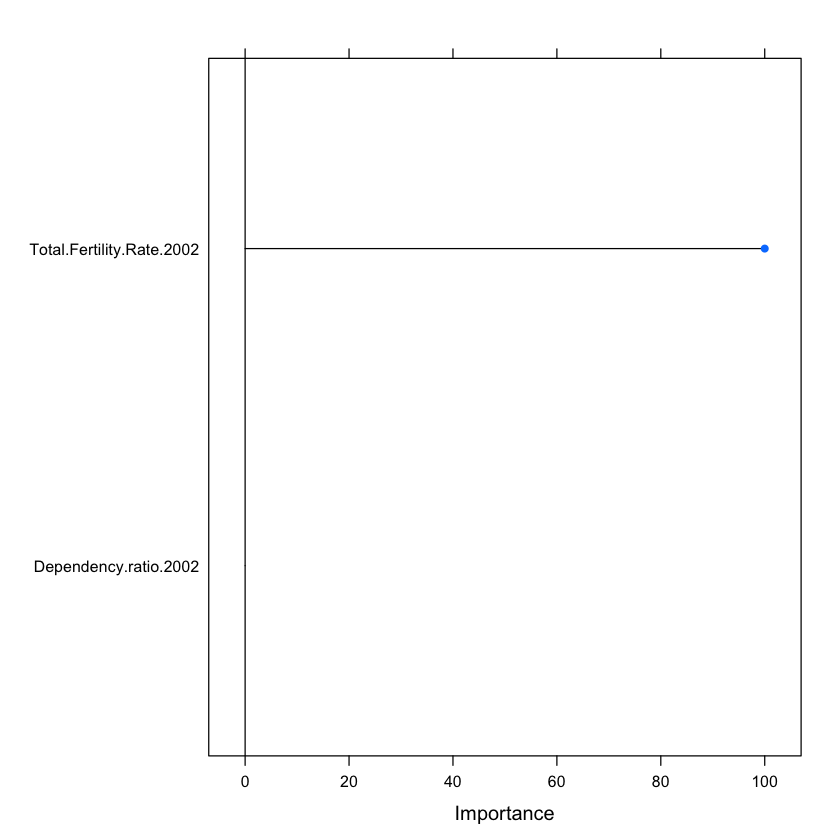

In [74]:
X <- caret::varImp(model)
plot(X)
X

In [75]:
model_4 <- glm(classification ~ Total.Fertility.Rate.2002,
               family = "binomial", data = df) 
summary(model_4)


Call:
glm(formula = classification ~ Total.Fertility.Rate.2002, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1282  -1.0244  -0.9356   1.3299   1.4227  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)                -0.9254     1.6447  -0.563    0.574
Total.Fertility.Rate.2002   0.2608     0.7892   0.330    0.741

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 26.920  on 19  degrees of freedom
Residual deviance: 26.811  on 18  degrees of freedom
AIC: 30.811

Number of Fisher Scoring iterations: 4


In [76]:
df$classification = as.factor(df$classification)
set.seed(998)
indxTrain <- createDataPartition(y = df$classification,p = 0.75,list = FALSE)
training <- df[indxTrain,] 
testing <- df[-indxTrain,] 

z = testing$classification
z = as.factor(z)

train.control <- trainControl(method = "cv", number = 10)
# Train the model
model <- train(classification ~ Dependency.ratio.2002 + 
               Total.Fertility.Rate.2002,
               data = training, method = "glm",
               trControl = train.control)

print(model)

Predict <- predict(model,newdata = testing)

confusionMatrix(Predict, z)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Generalized Linear Model 

15 samples
 2 predictor
 2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 14, 14, 14, 13, 13, 14, ... 
Resampling results:

  Accuracy  Kappa
  0.55      0    



Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 2 2
         1 1 0
                                          
               Accuracy : 0.4             
                 95% CI : (0.0527, 0.8534)
    No Information Rate : 0.6             
    P-Value [Acc > NIR] : 0.913           
                                          
                  Kappa : -0.3636         
                                          
 Mcnemar's Test P-Value : 1.000           
                                          
            Sensitivity : 0.6667          
            Specificity : 0.0000          
         Pos Pred Value : 0.5000          
         Neg Pred Value : 0.0000          
             Prevalence : 0.6000          
         Detection Rate : 0.4000          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.3333          
                                          
       'Positive' Class : 0               
                                          

In [83]:
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(df), 0.8*nrow(df))  # row indices for training data

xvars.train <- as.matrix(df[trainingRowIndex,3:29])
xvars.test <- as.matrix(df[-trainingRowIndex,3:29])

y.train <- as.matrix(df[trainingRowIndex, 30])
y.test <- as.matrix(df[-trainingRowIndex, 30])

In [84]:
library(glmnet)
fitlasso <- glmnet(xvars.train, y.train, family="binomial", alpha=1)
fitridge <- glmnet(xvars.train, y.train, family="binomial", alpha=0)
fitelnet <- glmnet(xvars.train, y.train, family="binomial", alpha=.5)

Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”


In [87]:
for (i in 0:10) {
    assign(paste("fit", i, sep=""), cv.glmnet(xvars.train, y.train, type.measure="mse", 
                                              alpha=i/10,family="binomial"))
}

Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous 

Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous 

Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”
Warning message in lognet(x, is.sparse, ix, jx, y, weights, offse

In [89]:
##Find best AIC/BIC for each model
##Ridge
tLL <- fitridge$nulldev - deviance(fitridge) ##Likelihood of the model
k <- fitridge$df ##Number of parameters
n <- fitridge$nobs ##Sample Size

##AIC

AICc <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc)
cat("Best AIC for Rigid: ", m, "\n")
best_AIC = match(c(min(AICc)),AICc)
print(paste("Lambda from AIC Ridge = ",fitridge$lambda[best_AIC]))

##BIC
BIC<-log(n)*k - tLL 
m = min(BIC)
cat("Best BIC for Rigid: ", m, "\n")
best_BIC = match(c(min(BIC)),BIC)
print(paste("Lambda from BIC Ridge = ",fitridge$lambda[best_BIC]))

##Lasso
##AIC
tLL <- fitlasso$nulldev - deviance(fitlasso)
k <- fitlasso$df
n <- fitlasso$nobs
AICc_lasso <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m = min(AICc_lasso)##Best AIC
cat("Best AIC for Lasso: ", m, "\n")
best_AIC_lasso = match(c(min(AICc_lasso)),AICc_lasso)##Which index is this?
print(paste("Lambda from AIC Lasso = ",fitlasso$lambda[best_AIC_lasso]))##Find this lambda

##BIC
BIC_lasso<-log(n)*k - tLL 
m = min(BIC_lasso)##Best BIC
cat("Best BIC for Lasso: ", m, "\n")
best_BIC_lasso = match(c(min(BIC_lasso)),BIC_lasso)##Which index is this?
print(paste("Lambda from BIC Lasso= ",fitlasso$lambda[best_BIC_lasso]))

##Elastic Net
##AIC
tLL <- fitelnet$nulldev - deviance(fitelnet)
k <- fitelnet$df
n <- fitelnet$nobs
AICc_elnet <- -tLL+2*k+2*k*(k+1)/(n-k-1)
m= min(AICc_elnet)##Best AIC
cat("Best AIC for Elastic Net: ", m, "\n")
best_AIC_elnet = match(c(min(AICc_elnet)),AICc_elnet)##Which index is this?
print(paste("Lambda AIC enet =",fitelnet$lambda[best_AIC_elnet]))##Find this lambda

##BIC
BIC_elnet<-log(n)*k - tLL 
m= min(BIC_elnet)##Best BIC
cat("Best BIC for Elastic Net: ", m, "\n")
best_BIC_elnet = match(c(min(BIC_elnet)),BIC_elnet)##Which index is this?
print(paste("Lambda BIC enet= ",fitelnet$lambda[best_BIC_elnet]))

#Ridge AIC/BIC
yRidgeAIC <- predict(fit0, s=fitridge$lambda[best_AIC], newx=xvars.test)
mseRidgeAIC <- mean((y.test - yRidgeAIC)^2)
print(paste("mse Ridge AIC = ", mseRidgeAIC))
yRidgeBIC <- predict(fit0, s=fitridge$lambda[best_BIC], newx=xvars.test)
mseRidgeBIC <- mean((y.test - yRidgeBIC)^2)
print(paste("mse Ridge BIC = ", mseRidgeBIC))

#Lasso AIC/BIC
yLassoAIC <- predict(fit10, s=fitlasso$lambda[best_AIC_lasso], newx=xvars.test)
mseLassoAIC <- mean((y.test - yLassoAIC)^2)
print(paste("mse Lasso AIC = ", mseLassoAIC)) 
yLassoBIC <- predict(fit10, s=fitlasso$lambda[best_BIC_lasso], newx=xvars.test)
mseLassoBIC <- mean((y.test - yLassoBIC)^2)
print(paste("mse Lasso BIC = ", mseLassoBIC)) 

#Elastic Net AIC/BIC
yelnetAIC <- predict(fit5, s=fitelnet$lambda[best_AIC_elnet], newx=xvars.test)
mseelnetAIC <- mean((y.test - yelnetAIC)^2)
print(paste("mse elnet AIC = ",mseelnetAIC))

yelnetBIC <- predict(fit5, s=fitelnet$lambda[best_BIC_elnet], newx=xvars.test)
mseelnetBIC <- mean((y.test - yelnetBIC)^2)
print(paste("mse elnet BIC = ",mseelnetBIC))

Best AIC for Rigid:  -73.51176 
[1] "Lambda from AIC Ridge =  1.51259593024607"
Best BIC for Rigid:  73.34814 
[1] "Lambda from BIC Ridge =  1.51259593024607"
Best AIC for Lasso:  0 
[1] "Lambda from AIC Lasso =  0.15125959237587"
Best BIC for Lasso:  0 
[1] "Lambda from BIC Lasso=  0.15125959237587"
Best AIC for Elastic Net:  -519.3928 
[1] "Lambda AIC enet = 0.0309637770970305"
Best BIC for Elastic Net:  0 
[1] "Lambda BIC enet=  0.30251918475174"


ERROR: Error in y.test - yRidgeAIC: non-numeric argument to binary operator


In [90]:
dfSC = read.csv("CumulativeCases.csv", header = T)

In [91]:
dfSC$China[1]

[1] 95

In [92]:
class(dfSC$Date)
dfSC$Date <- as.character(dfSC$Date)
dfSC$Date <- as.POSIXct(dfSC$Date)

[1] "factor"

`geom_smooth()` using formula 'y ~ x'

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


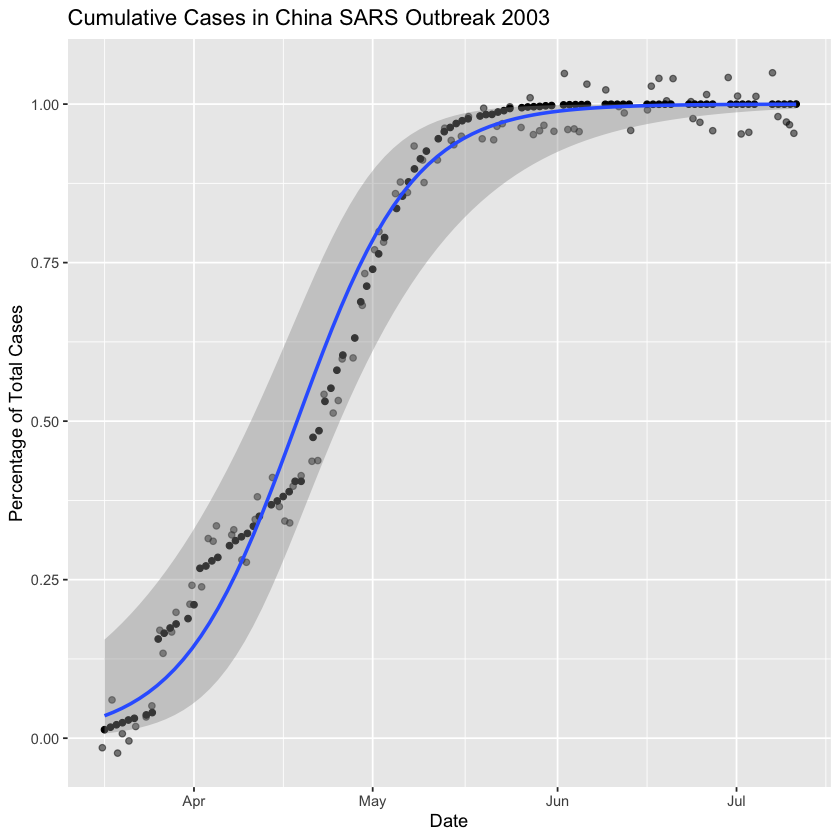

In [93]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China/7084)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            stat_smooth(method = "glm", method.args = list(family = "binomial"), se = TRUE) + 
            ylab("Percentage of Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")


In [94]:
log_reg <- glm(China/7084 ~ seq(1,96,1), data = dfSC, family = binomial)

log_reg

Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”



Call:  glm(formula = China/7084 ~ seq(1, 96, 1), family = binomial, 
    data = dfSC)

Coefficients:
  (Intercept)  seq(1, 96, 1)  
      -3.4763         0.1197  

Degrees of Freedom: 95 Total (i.e. Null);  94 Residual
Null Deviance:	    66.84 
Residual Deviance: 1.522 	AIC: 32.36

In [95]:
library(stats)

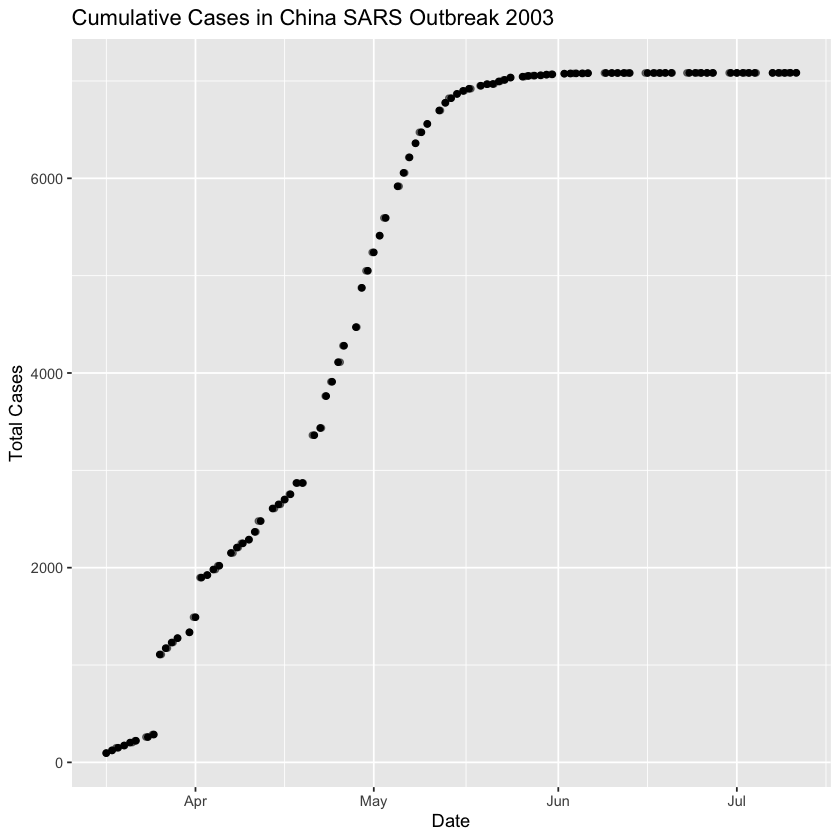

In [96]:
log_plot <- ggplot(data = dfSC, aes(x = Date, y = China)) + 
geom_jitter(alpha = 0.5, height = 0.05) +  geom_point() + 
            ylab("Total Cases")
log_plot + ggtitle("Cumulative Cases in China SARS Outbreak 2003")

In [97]:
#find the parameters for the equation
times <- seq(1,96,1)
SS<-getInitial(dfSC$China~SSlogis(times,alpha,xmid,scale),data=data.frame(dfSC$China==dfSC$China,times=times))
SS

alpha        xmid       scale 
7234.622282   30.381557    9.725367

In [102]:
K_0<-SS["alpha"]
R_0<-1/SS["scale"]
N0<-SS["alpha"]/(exp(SS["xmid"]/SS["scale"])+1)
y <- dfSC$China

m<-nls(y~K*N0*exp(R*times)/(K+N0*(exp(R*times)-1)),start=list(K=K_0,R=R_0,N0=N0))
#estimated parameters
summary(m)

c <- cor(y,predict(m))
cat("correlation coefficient: ", c, "\n")

AIC <- AIC(m)
cat("AIC: ", AIC)


Formula: y ~ K * N0 * exp(R * times)/(K + N0 * (exp(R * times) - 1))

Parameters:
          Estimate Std. Error t value Pr(>|t|)    
K.alpha  7.235e+03  4.944e+01  146.34   <2e-16 ***
R.scale  1.028e-01  3.240e-03   31.73   <2e-16 ***
N0.alpha 3.048e+02  2.847e+01   10.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 273.3 on 93 degrees of freedom

Number of iterations to convergence: 0 
Achieved convergence tolerance: 1.42e-06


correlation coefficient:  0.9942102 
AIC:  1354.648

In [12]:
Days = times
Total_cases = dfSC$China

plot(Days, Total_cases) + lines(times,predict(m),col="red", lty=1,lwd=3)
title(main = "Cumulative Cases in China SARS Outbreak 2003")

ERROR: Error in eval(expr, envir, enclos): object 'times' not found


In [13]:
yC = read.csv("Comp20032020.csv")

In [14]:
str(yC)

'data.frame':	14 obs. of  4 variables:
 $ X               : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Country         : Factor w/ 8 levels "Canada","China",..: 1 3 4 5 6 8 2 1 3 4 ...
 $ Cumulative.Cases: int  252 10 9 206 220 63 7084 6280 62095 97689 ...
 $ Year            : int  2003 2003 2003 2003 2003 2003 2003 2020 2020 2020 ...


In [ ]:
yC

In [ ]:
library(lattice)
histogram(~Cumulative.Cases|factor(Year),
         data = yC,
         layout = c(1,2),
         nint = 1,
         xlab = "Cumulative Cases",
         strip = FALSE,
         strip.left = TRUE,
         breaks=seq(from=0,to=150000,by=10000),
         ylab = "Percentage of the Data")

100 percent of the data is below 5000 cumulative cases in 2003. 